The solution for kr>0 is derived in M3.1 Benchmarking problem, here a plot for small $kr$.

For constant $ \psi_s $,  $kr$ and $kz$ we can solve above equation yielding the analytical solution

$$ \psi_r(l) := \psi_s + d_1 e^{\tau l } + d_2 e^{-\tau l} $$

$\tau$, $d1$, and $d2$ defined below

[-13523.75481097  13223.75481097]
-500.0 -200.0


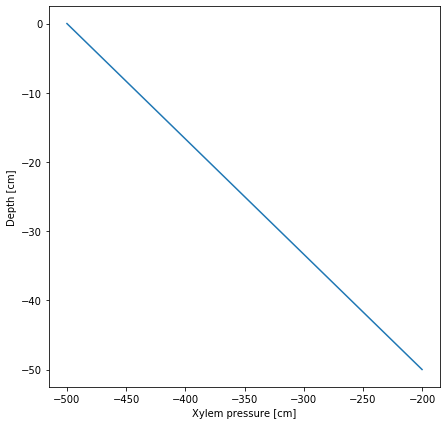

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt

L = 50 # length of single straight root [cm]
a = 0.2 # radius  [cm]
kx = 0.0432 # axial conductivity [cm^3 / day] 
kr = 1.73e-9 # radial conductivity [1 / day]
psi_s = -200 # constant soil matric potential [cm]
psi_i = -500 - psi_s # matric potential at node i [cm]
psi_j = -200 - psi_s # matric potential at node j [cm]

tau = np.sqrt(2*a*np.pi*kr/kx)

# Boundary conditions
AA = np.array([[1,1], [exp(tau*(-L)), exp(-tau*(-L))] ]) 
bb = np.array([psi_i, psi_j]) 
d = np.linalg.solve(AA, bb) 
print(d)

# Analytical solution
p_r = lambda z: p_s + d[0]*exp(tau*z) + d[1]*exp(-tau*z)

print(p_r(0), p_r(-50))

# Plot results
fig=plt.figure(figsize=(7, 7))
za_ = np.linspace(0,-L,1000)
pr = list(map(p_r, za_))
plt.plot(pr,za_)
plt.xlabel("Xylem pressure [cm]")
plt.ylabel("Depth [cm]")
plt.show()